In [1]:
import sys
sys.path.insert(0, '../../../network')

In [2]:
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule, set_connectivity 
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

In [3]:
params = np.load("./params.npz", allow_pickle=True) 
N, sequences, patterns, cp, cw, A = params['N'], params['sequences'], params['patterns'], params['cp'], params['cw'], params['A']

In [4]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8)

# populations
ctx = Population(N=N[0], tau=1e-2, phi=phi, name='ctx')
d1 = Population(N=N[1], tau=1e-2, phi=phi, name='d1')
d2 = Population(N=N[2], tau=1e-2, phi=phi, name='d2')

J = set_connectivity([ctx, d1, d2], cp, cw, A, patterns, plasticity)
network = RateNetwork([ctx, d1, d2], J, formulation=4, disable_pbar=False)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Building connections from ctx to d1
INFO:connectivity:Building connections from ctx to d2
INFO:connectivity:Building connections from d1 to ctx
INFO:connectivity:Building connections from d1 to d1
INFO:connectivity:Building connections from d1 to d2


INFO:connectivity:Building connections from d2 to ctx
INFO:connectivity:Building connections from d2 to d1
INFO:connectivity:Building connections from d2 to d2


In [5]:
init_inputs = [patterns[0][0][0],
               np.zeros(d1.size),
               np.zeros(d2.size)]
input_patterns = [p[0] for p in patterns]

T=50 #ms
mouse = ReachingTask()
network.simulate_learning(mouse, T, init_inputs, input_patterns, plasticity, 
                          delta_t=350, eta=0.005, tau_e=1000, lamb=0.5, 
                          noise=[0.13,0.13,0.13], env=[.1, .02, .1, .13], a=0.5, etrace=False, hyper=False,
                          r_ext=[lambda t:0, lambda t: .7, lambda t: 0], print_output=False)

INFO:network:Integrating network dynamics
  0%|          | 0/9999 [00:00<?, ?it/s]

ctx 0.2427749485633373 0.0
bg 0.0 0.1700081686179193


  2%|▏         | 161/9999 [00:02<01:12, 136.02it/s]

ctx 0.15529864764054954 0.0
bg -0.9359255014265901 0.3338593038490113


  3%|▎         | 257/9999 [00:03<00:43, 225.34it/s]

ctx 0.15769130290611974 0.0
bg -0.9149331087477884 0.3239720284385749


  4%|▎         | 352/9999 [00:03<00:35, 275.32it/s]

ctx 0.15125773194664202 0.0
bg -0.8905075260939838 0.3167098009855276


  4%|▍         | 449/9999 [00:03<00:32, 296.45it/s]

ctx 0.15640600696637486 0.0
bg -0.9262056912456327 0.3238761294472179


  5%|▌         | 544/9999 [00:03<00:30, 306.46it/s]

ctx 0.1445055977882915 0.0
bg -0.914854805949432 0.3173201678910988


  6%|▋         | 640/9999 [00:04<00:31, 299.03it/s]

ctx 0.138115122698934 0.0
bg -0.9308785481184179 0.3185882539720478


  7%|▋         | 733/9999 [00:04<00:30, 301.66it/s]

ctx 0.14747620422289553 0.0
bg -0.8919449636515152 0.3028928671125611


  9%|▊         | 857/9999 [00:04<00:30, 299.39it/s]

ctx 0.1385300821941871 0.0
bg -1.027941748848947 0.3085672513158941


  9%|▉         | 947/9999 [00:05<00:30, 292.50it/s]

ctx 0.1282709509394731 0.0
bg -0.956271175970397 0.2989283668379859


 10%|█         | 1038/9999 [00:05<00:30, 298.32it/s]

ctx 0.13837015387378498 0.0
bg -0.9379989018500223 0.3009480029095618


 11%|█▏        | 1132/9999 [00:05<00:29, 304.59it/s]

ctx 0.12148106060857822 0.0
bg -0.8908581357593206 0.29469098166146507


 13%|█▎        | 1256/9999 [00:06<00:28, 304.28it/s]

ctx 0.1315749655453583 0.0
bg -0.9643166416470735 0.2943452508823148


 14%|█▎        | 1350/9999 [00:06<00:28, 307.81it/s]

ctx 0.1333033650372837 0.0
bg -0.8962812073696027 0.277836889179748


 14%|█▍        | 1446/9999 [00:06<00:27, 310.25it/s]

ctx 0.12259955624270162 0.0
bg -0.9382716934959034 0.2815778926584652


 15%|█▌        | 1540/9999 [00:07<00:27, 307.88it/s]

ctx 0.07167463578364874 0.0
bg -1.0085262839466047 0.2433918440948937


 16%|█▋        | 1634/9999 [00:07<00:27, 309.45it/s]

ctx 0.08403270123747959 0.0
bg -0.9778606657534419 0.2817184954651988


 18%|█▊        | 1759/9999 [00:07<00:26, 308.01it/s]

ctx 0.08731152725049236 0.0
bg -0.9218261041154283 0.2891296523958759


 19%|█▊        | 1853/9999 [00:08<00:26, 308.18it/s]

ctx 0.1011988236361222 0.0
bg -0.9254277418448312 0.2785366872390959


 19%|█▉        | 1947/9999 [00:08<00:26, 306.87it/s]

ctx 0.08905395068850673 0.0
bg -0.9066072170794953 0.2686647229049252


 20%|██        | 2041/9999 [00:08<00:25, 306.23it/s]

ctx 0.08260627153576765 0.0
bg -0.9542402130010892 0.2553408433281796


 21%|██▏       | 2134/9999 [00:09<00:25, 305.83it/s]

ctx 0.07938660970575831 0.0
bg -0.9360552054759067 0.23740739537475444


 23%|██▎       | 2259/9999 [00:09<00:25, 306.19it/s]

ctx 0.08410228752210105 0.0
bg -0.9331567872493187 0.2414827447295414


 24%|██▎       | 2353/9999 [00:09<00:26, 290.34it/s]

ctx 0.11825595457517715 0.0
bg -1.0207899518510093 0.26787942118929947


 24%|██▍       | 2445/9999 [00:10<00:25, 294.13it/s]

ctx 0.1437142623891032 0.0
bg -0.9199661096243414 0.3082839493085187


 25%|██▌       | 2538/9999 [00:10<00:24, 301.68it/s]

ctx 0.14452343969386214 0.0
bg -0.8709744352545464 0.31661577495389565


 27%|██▋       | 2664/9999 [00:10<00:23, 309.10it/s]

ctx 0.13839194073712632 0.0
bg -0.9323775251439563 0.29937136369485784


 28%|██▊       | 2758/9999 [00:11<00:23, 308.92it/s]

ctx 0.1450083155847746 0.0
bg -0.9268812934790928 0.3102048386251096


 29%|██▊       | 2852/9999 [00:11<00:23, 308.38it/s]

ctx 0.14021537959134586 0.0
bg -0.8753610479283804 0.3009524206786273


 29%|██▉       | 2946/9999 [00:11<00:22, 308.82it/s]

ctx 0.14111069856480296 0.0
bg -0.9319705416666775 0.29718542153839644


 30%|███       | 3039/9999 [00:12<00:22, 308.57it/s]

ctx 0.1124377041534841 0.0
bg -0.9283656662713574 0.23718343264488015


 31%|███▏      | 3132/9999 [00:12<00:23, 298.05it/s]

ctx 0.13870943405570313 0.0
bg -0.9699582181071826 0.3048249827075678


 33%|███▎      | 3256/9999 [00:12<00:22, 300.18it/s]

ctx 0.12914160135349526 0.0
bg -0.9100658693190521 0.2927597215565019


 34%|███▎      | 3351/9999 [00:13<00:21, 306.57it/s]

ctx 0.1398548016257117 0.0
bg -0.9018969580755999 0.29750276935024156


 34%|███▍      | 3445/9999 [00:13<00:21, 306.77it/s]

ctx 0.1323989866003542 0.0
bg -0.9146074491387112 0.2978448189007505


 35%|███▌      | 3538/9999 [00:13<00:21, 303.44it/s]

ctx 0.12540562802296315 0.0
bg -0.8997535734661967 0.28140321100971083


 36%|███▋      | 3631/9999 [00:14<00:21, 301.43it/s]

ctx 0.12752336240444218 0.0
bg -0.9287486398570357 0.27850331873933


 38%|███▊      | 3755/9999 [00:14<00:21, 288.87it/s]

ctx 0.1182172192499707 0.0
bg -0.9328248085795252 0.26261421327270745


 38%|███▊      | 3848/9999 [00:14<00:20, 301.63it/s]

ctx 0.03807760465468224 0.0
bg -1.009395281031572 0.18851003439375352


 39%|███▉      | 3941/9999 [00:15<00:19, 304.75it/s]

ctx 0.10526718978052016 0.0
bg -0.9387267519911267 0.30285534274416515


 40%|████      | 4035/9999 [00:15<00:19, 303.30it/s]

ctx 0.09342448275601142 0.0
bg -0.9033074205007612 0.2840627663946297


 42%|████▏     | 4160/9999 [00:15<00:19, 304.23it/s]

ctx 0.09186936837580394 0.0
bg -0.9517173683983476 0.2860684526624673


 43%|████▎     | 4254/9999 [00:16<00:18, 305.09it/s]

ctx 0.08002238578726675 0.0
bg -0.9103354130192346 0.2519386996951674


 43%|████▎     | 4285/9999 [00:16<00:18, 303.32it/s]

ctx 0.08927646042640966 0.0
bg -0.9593565045814427 0.26116248536067976


 44%|████▍     | 4438/9999 [00:16<00:18, 299.86it/s]

ctx 0.07575744559516695 0.0
bg -0.9420873440356894 0.24973752594663257


 46%|████▌     | 4562/9999 [00:17<00:18, 300.53it/s]

ctx 0.05901451395893264 0.0
bg -0.9547013074823332 0.1727456884021585


 47%|████▋     | 4655/9999 [00:17<00:17, 303.45it/s]

ctx 0.14551974908473672 0.0
bg -0.9190380806967623 0.3213096238503531


 47%|████▋     | 4749/9999 [00:17<00:17, 305.10it/s]

ctx 0.14126637288032665 0.0
bg -0.9278809690424191 0.3080666375374235


 48%|████▊     | 4842/9999 [00:18<00:16, 305.76it/s]

ctx 0.13237682571443676 0.0
bg -0.9062892419976021 0.30500649818224557


 49%|████▉     | 4935/9999 [00:18<00:16, 306.24it/s]

ctx 0.14171100706045245 0.0
bg -0.932196961945289 0.31019971724280476


 51%|█████     | 5063/9999 [00:18<00:16, 307.50it/s]

ctx 0.126132326777363 0.0
bg -0.8995917970167341 0.2884878224550891


 52%|█████▏    | 5156/9999 [00:19<00:15, 305.54it/s]

ctx 0.14822820066974088 0.0
bg -0.9269971720673138 0.31522387179364136


 52%|█████▏    | 5249/9999 [00:19<00:15, 303.37it/s]

ctx 0.13855392526255056 0.0
bg -0.8966459512569915 0.30015208901786833


 53%|█████▎    | 5342/9999 [00:19<00:15, 304.52it/s]

ctx 0.1298661716962232 0.0
bg -1.0541779357376344 0.3067112310704683


 54%|█████▍    | 5436/9999 [00:20<00:14, 306.29it/s]

ctx 0.11945553332804844 0.0
bg -0.9161725110898923 0.28608159725664706


 56%|█████▌    | 5560/9999 [00:20<00:14, 305.08it/s]

ctx 0.13029933601707203 0.0
bg -0.9401551999814938 0.29692348464056106


 57%|█████▋    | 5654/9999 [00:20<00:14, 306.40it/s]

ctx 0.1264683605258339 0.0
bg -0.8988665325142192 0.28212699948680087


 57%|█████▋    | 5748/9999 [00:21<00:13, 306.48it/s]

ctx 0.1359475845823046 0.0
bg -0.9358578262264216 0.29931899505313125


 58%|█████▊    | 5842/9999 [00:21<00:13, 307.73it/s]

ctx 0.119614359934404 0.0
bg -0.931122089276606 0.2785948354134846


 59%|█████▉    | 5935/9999 [00:21<00:13, 306.86it/s]

ctx 0.1227045958451423 0.0
bg -0.9123647234829338 0.2747916004686296


 61%|██████    | 6061/9999 [00:22<00:12, 307.52it/s]

ctx 0.05003608664437217 0.0
bg -0.9645040041728007 0.20359266068303775


 62%|██████▏   | 6154/9999 [00:22<00:12, 306.00it/s]

ctx 0.09323240923135317 0.0
bg -0.9181322924886729 0.2900403044520629


 62%|██████▏   | 6247/9999 [00:22<00:12, 301.76it/s]

ctx 0.090473481542952 0.0
bg -0.9129831844830872 0.2908880823422515


 63%|██████▎   | 6339/9999 [00:23<00:13, 278.97it/s]

ctx 0.09217941717293723 0.0
bg -0.935394630210962 0.28057995085313153


 65%|██████▍   | 6462/9999 [00:23<00:11, 296.15it/s]

ctx 0.08518357637672448 0.0
bg -0.8933107541600028 0.26019308624545573


 66%|██████▌   | 6556/9999 [00:23<00:11, 304.07it/s]

ctx 0.07327001706756471 0.0
bg -0.8962063057519013 0.22761260300939246


 66%|██████▋   | 6649/9999 [00:24<00:11, 301.89it/s]

ctx 0.016743681452147344 0.0
bg -0.8803033688894564 0.049669015488901264


 67%|██████▋   | 6742/9999 [00:24<00:10, 301.63it/s]

ctx 0.15018913825807084 0.0
bg -0.9501086059560869 0.312934036825806


 68%|██████▊   | 6835/9999 [00:24<00:10, 303.58it/s]

ctx 0.14791422193595938 0.0
bg -0.9065511155265173 0.3156332537346022


 70%|██████▉   | 6960/9999 [00:25<00:09, 306.58it/s]

ctx 0.1459037067994237 0.0
bg -0.9456207569525518 0.318648062525626


 71%|███████   | 7054/9999 [00:25<00:09, 309.38it/s]

ctx 0.15261437964412783 0.0
bg -0.930822459158065 0.3132228737154897


 71%|███████▏  | 7148/9999 [00:25<00:09, 307.76it/s]

ctx 0.14150455333677647 0.0
bg -0.9420983197102563 0.31221371975484524


 72%|███████▏  | 7243/9999 [00:26<00:08, 308.34it/s]

ctx 0.1295372208313025 0.0
bg -0.8759835822741063 0.29966626831763715


 73%|███████▎  | 7337/9999 [00:26<00:08, 306.36it/s]

ctx 0.13981767226905395 0.0
bg -0.9243830709516897 0.30570858658611144


 75%|███████▍  | 7461/9999 [00:26<00:08, 306.59it/s]

ctx 0.12396744126740553 0.0
bg -1.0555714121878121 0.2981524423430546


 76%|███████▌  | 7554/9999 [00:27<00:07, 306.02it/s]

ctx 0.13065513573193022 0.0
bg -0.9269883620719858 0.2879214323819775


 76%|███████▋  | 7647/9999 [00:27<00:07, 301.93it/s]

ctx 0.1270189756429708 0.0
bg -0.9150760495182162 0.28724423881370514


 77%|███████▋  | 7741/9999 [00:27<00:07, 307.29it/s]

ctx 0.13072785849144786 0.0
bg -0.9361882767159962 0.29704967013399763


 78%|███████▊  | 7835/9999 [00:27<00:07, 303.49it/s]

ctx 0.1308958530058422 0.0
bg -0.9449486527807202 0.292556277584426


 80%|███████▉  | 7959/9999 [00:28<00:06, 304.22it/s]

ctx 0.11727097650208283 0.0
bg -0.9239195041881135 0.29072986504487264


 81%|████████  | 8053/9999 [00:28<00:06, 305.30it/s]

ctx 0.13149800821179491 0.0
bg -0.9047037624571779 0.2881323835411161


 81%|████████▏ | 8147/9999 [00:29<00:06, 308.01it/s]

ctx 0.08946792093614893 0.0
bg -0.9225143796137516 0.17676249515845074


 82%|████████▏ | 8240/9999 [00:29<00:05, 304.81it/s]

ctx 0.08695175735362488 0.0
bg -0.9699743363706752 0.279647306954614


 83%|████████▎ | 8334/9999 [00:29<00:05, 306.72it/s]

ctx 0.09659298901333704 0.0
bg -0.9592044598689011 0.2953616986374739


 85%|████████▍ | 8459/9999 [00:30<00:05, 306.58it/s]

ctx 0.08702518098601772 0.0
bg -0.8969666720129011 0.28776597539030546


 86%|████████▌ | 8551/9999 [00:30<00:04, 299.03it/s]

ctx 0.08729493676975904 0.0
bg -0.9285353596192387 0.2729178265280968


 86%|████████▋ | 8644/9999 [00:30<00:04, 303.90it/s]

ctx 0.08821138355967234 0.0
bg -0.9504819760993414 0.271977415253963


 87%|████████▋ | 8737/9999 [00:30<00:04, 304.27it/s]

ctx 0.05374500042123985 0.0
bg -0.9033435362362485 0.17504709535484514


 89%|████████▊ | 8862/9999 [00:31<00:03, 305.07it/s]

ctx 0.13014678900862875 0.0
bg -1.0592145469167273 0.3023105550344117


 90%|████████▉ | 8956/9999 [00:31<00:03, 307.62it/s]

ctx 0.14834010098627845 0.0
bg -0.9046339234710464 0.3192952902502531


 91%|█████████ | 9050/9999 [00:31<00:03, 308.48it/s]

ctx 0.14918905101869503 0.0
bg -0.9291208591952042 0.3134763484340278


 91%|█████████▏| 9143/9999 [00:32<00:02, 305.91it/s]

ctx 0.1431259605532595 0.0
bg -0.8883614083350152 0.3038202559597093


 92%|█████████▏| 9236/9999 [00:32<00:02, 302.05it/s]

ctx 0.14542154768826504 0.0
bg -0.9016561368903687 0.3110436268213822


 94%|█████████▎| 9362/9999 [00:33<00:02, 307.41it/s]

ctx 0.15200747039159127 0.0
bg -0.9736996817220491 0.3036536878830844


 95%|█████████▍| 9455/9999 [00:33<00:01, 307.72it/s]

ctx 0.13473476611379087 0.0
bg -0.908835673922779 0.2906333644957545


 96%|█████████▌| 9551/9999 [00:33<00:01, 311.05it/s]

ctx 0.11563923817666087 0.0
bg -0.938714880747992 0.24629819471349051


 96%|█████████▋| 9647/9999 [00:33<00:01, 311.58it/s]

ctx 0.14148253961005935 0.0
bg -0.9139817345252346 0.3103720849646311


 97%|█████████▋| 9742/9999 [00:34<00:00, 309.38it/s]

ctx 0.13282042506773675 0.0
bg -0.9563830419735765 0.3018417901864853


 98%|█████████▊| 9837/9999 [00:34<00:00, 311.31it/s]

ctx 0.12588056023897407 0.0
bg -0.8980394186651075 0.2924535449548966


100%|█████████▉| 9964/9999 [00:34<00:00, 309.32it/s]

ctx 0.12413449974110793 0.0
bg -0.9264896105387885 0.2892934831986512


100%|█████████▉| 9996/9999 [00:35<00:00, 310.85it/s]

In [6]:
overlaps_ctx = sequences[0][0].overlaps(network.pops[0])
overlaps_d1 = sequences[1][0].overlaps(network.pops[1])
overlaps_d2 = sequences[2][0].overlaps(network.pops[2])
# filename = 'learning-0005-1600-600-5-1000-v0'
# np.savez('./data/' + filename + '.npz', 
#          overlaps_ctx=overlaps_ctx, overlaps_bg=overlaps_bg, 
#          correlations_ctx=correlations_ctx, correlations_bg=correlations_bg, 
#          state_ctx=net_ctx.exc.state, state_bg=net_bg.exc.state)

INFO:sequences:Computing overlaps

100%|██████████| 4/4 [00:00<00:00, 104.08it/s]
INFO:sequences:Computing overlaps

100%|██████████| 4/4 [00:00<00:00, 160.77it/s]
INFO:sequences:Computing overlaps

100%|██████████| 4/4 [00:00<00:00, 192.53it/s]


100%|██████████| 9999/9999 [02:48<00:00, 59.18it/s] 


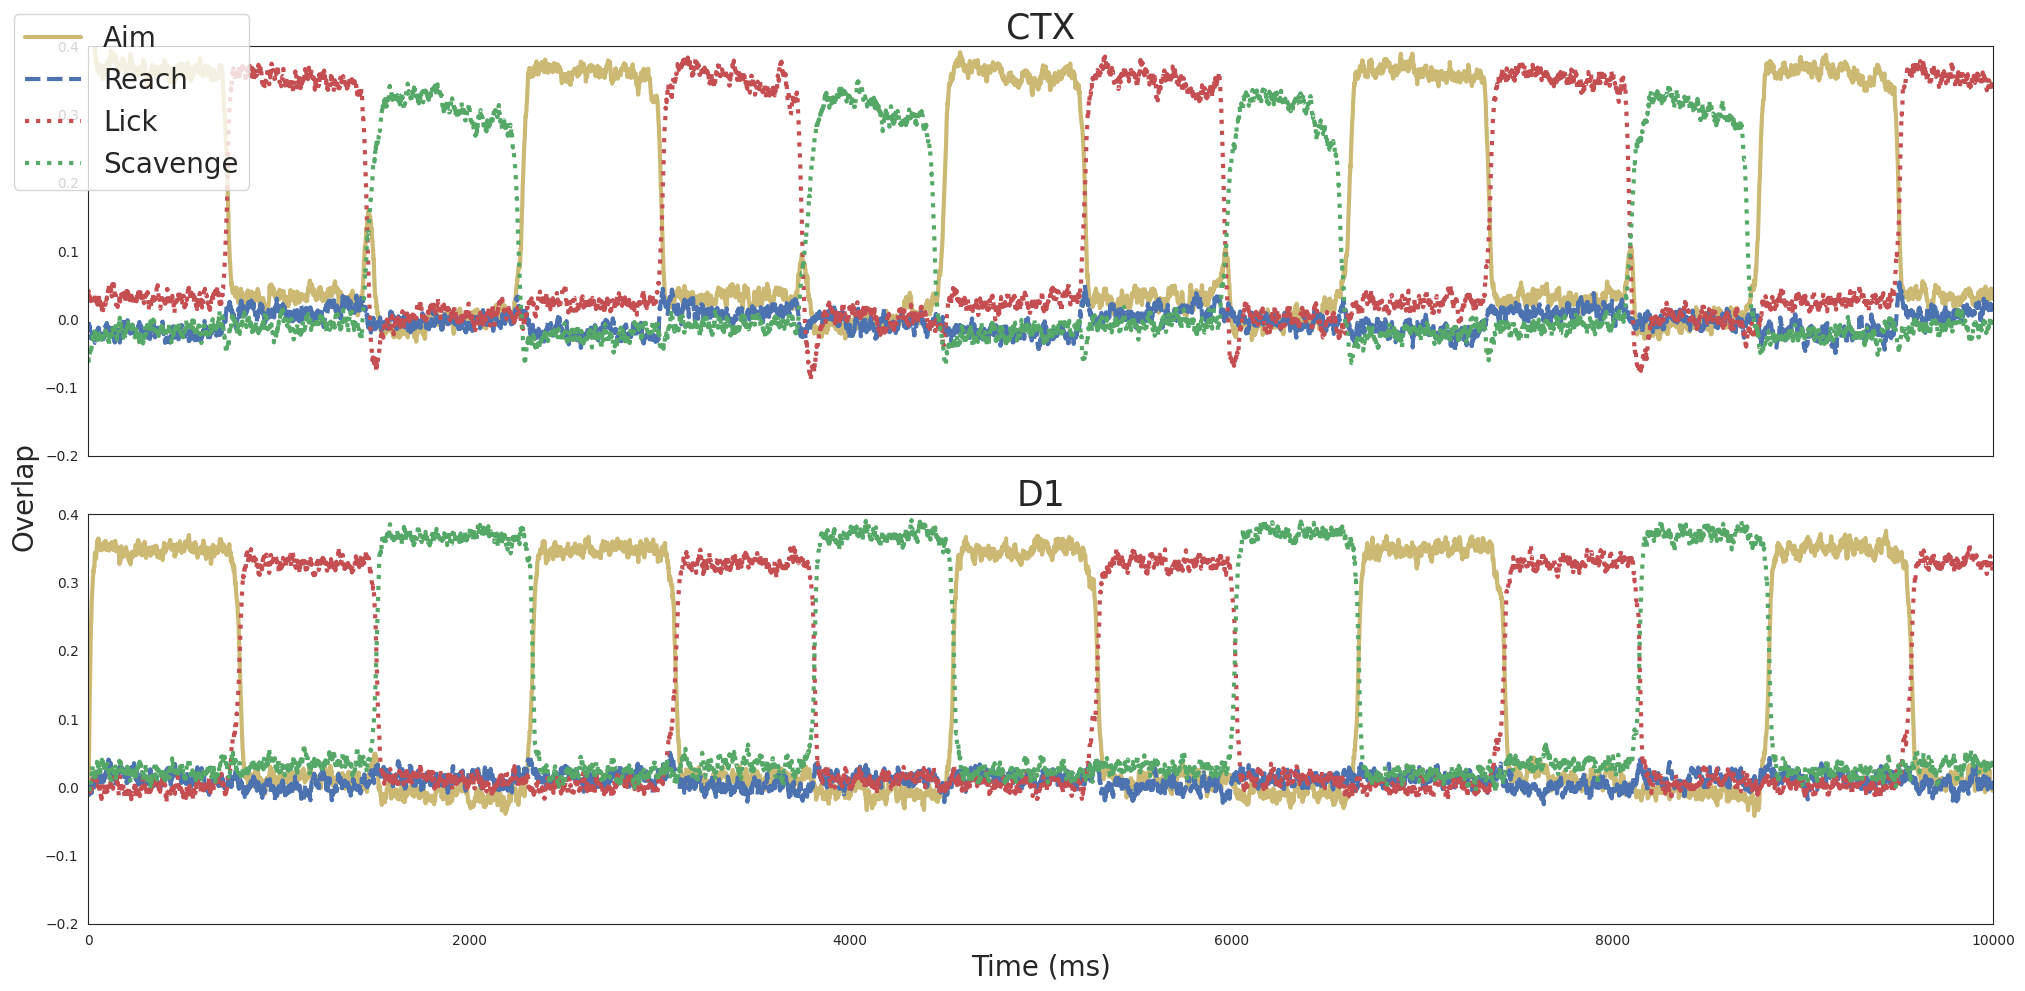

In [8]:
sns.set_style('white') 
colors = sns.color_palette('deep')

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, tight_layout=True, figsize=(20,10))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=3, color=colors[8], label='Aim')
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=3, color=colors[0], label='Reach')
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=3, color=colors[3], label='Lick')
axes[0].plot(overlaps_ctx[3], linestyle='dotted', linewidth=3, color=colors[2], label='Scavenge')
# axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
# axes.set_xlabel('Time (ms)', fontsize=20)
axes[1].plot(overlaps_d1[0], linestyle='solid', linewidth=3, color=colors[8])
axes[1].plot(overlaps_d1[1], linestyle='dashed', linewidth=3, color=colors[0])
axes[1].plot(overlaps_d1[2], linestyle='dotted', linewidth=3, color=colors[3])
axes[1].plot(overlaps_d1[3], linestyle='dotted', linewidth=3, color=colors[2])
# axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("D1", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
axes[1].set_xlabel('Time (ms)', fontsize=20)
# axes[2].plot(overlaps_d2[0], linestyle='solid', linewidth=3, color=colors[8])
# axes[2].plot(overlaps_d2[1], linestyle='dashed', linewidth=3, color=colors[0])
# axes[2].plot(overlaps_d2[2], linestyle='dotted', linewidth=3, color=colors[3])
# axes[2].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
# axes[2].set_title("D2", fontsize=25)
# axes[2].set_xlabel('Time (ms)', fontsize=20)
# axes[3].plot(np.average(network.pops[1].depression, axis=0), label='y')
# axes[3].plot(np.average(network.pops[1].state, axis=0), label='r')
# axes[3].plot(np.average(network.pops[1].depression * network.pops[1].state, axis=0), label='yr')
# axes[4].plot(np.average(network.pops[2].depression, axis=0))
# axes[4].plot(np.average(network.pops[2].state, axis=0))
# axes[4].plot(np.average(network.pops[2].depression * network.pops[2].state, axis=0))
fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 10000))
plt.setp(axes, ylim=(-.2, .4))
plt.figlegend(fontsize=20, loc='upper left')
# plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.savefig('/work/jp464/striatum-sequence/output/secondary-env.jpg', bbox_inches = "tight", format='jpg')

plt.show()
